# CodSoft Machine Learning Internship
### Name: Shivam Shashikant Sagar
### Batch - DEC BATCH A24
## Task 1: MOVIE GENRE CLASSIFICATION
### Create a machine learning model that can predict the genre of a <br> movie base on its plot summary or other textual information

### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Importing the dataset

In [2]:
#Imporitng train_data Dataset
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(train_data.head()))
print(train_data.shape)

C:\Users\Shivam Sagar\AppData\Local\Temp\ipykernel_8652\2593086527.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


None
(54214, 4)


In [3]:
#Importing test_data Dataset
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

C:\Users\Shivam Sagar\AppData\Local\Temp\ipykernel_8652\1210494132.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [4]:
#Importing test_solution_data Dataset
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\Shivam Sagar\AppData\Local\Temp\ipykernel_8652\3695579918.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


# Visualizing Dataset

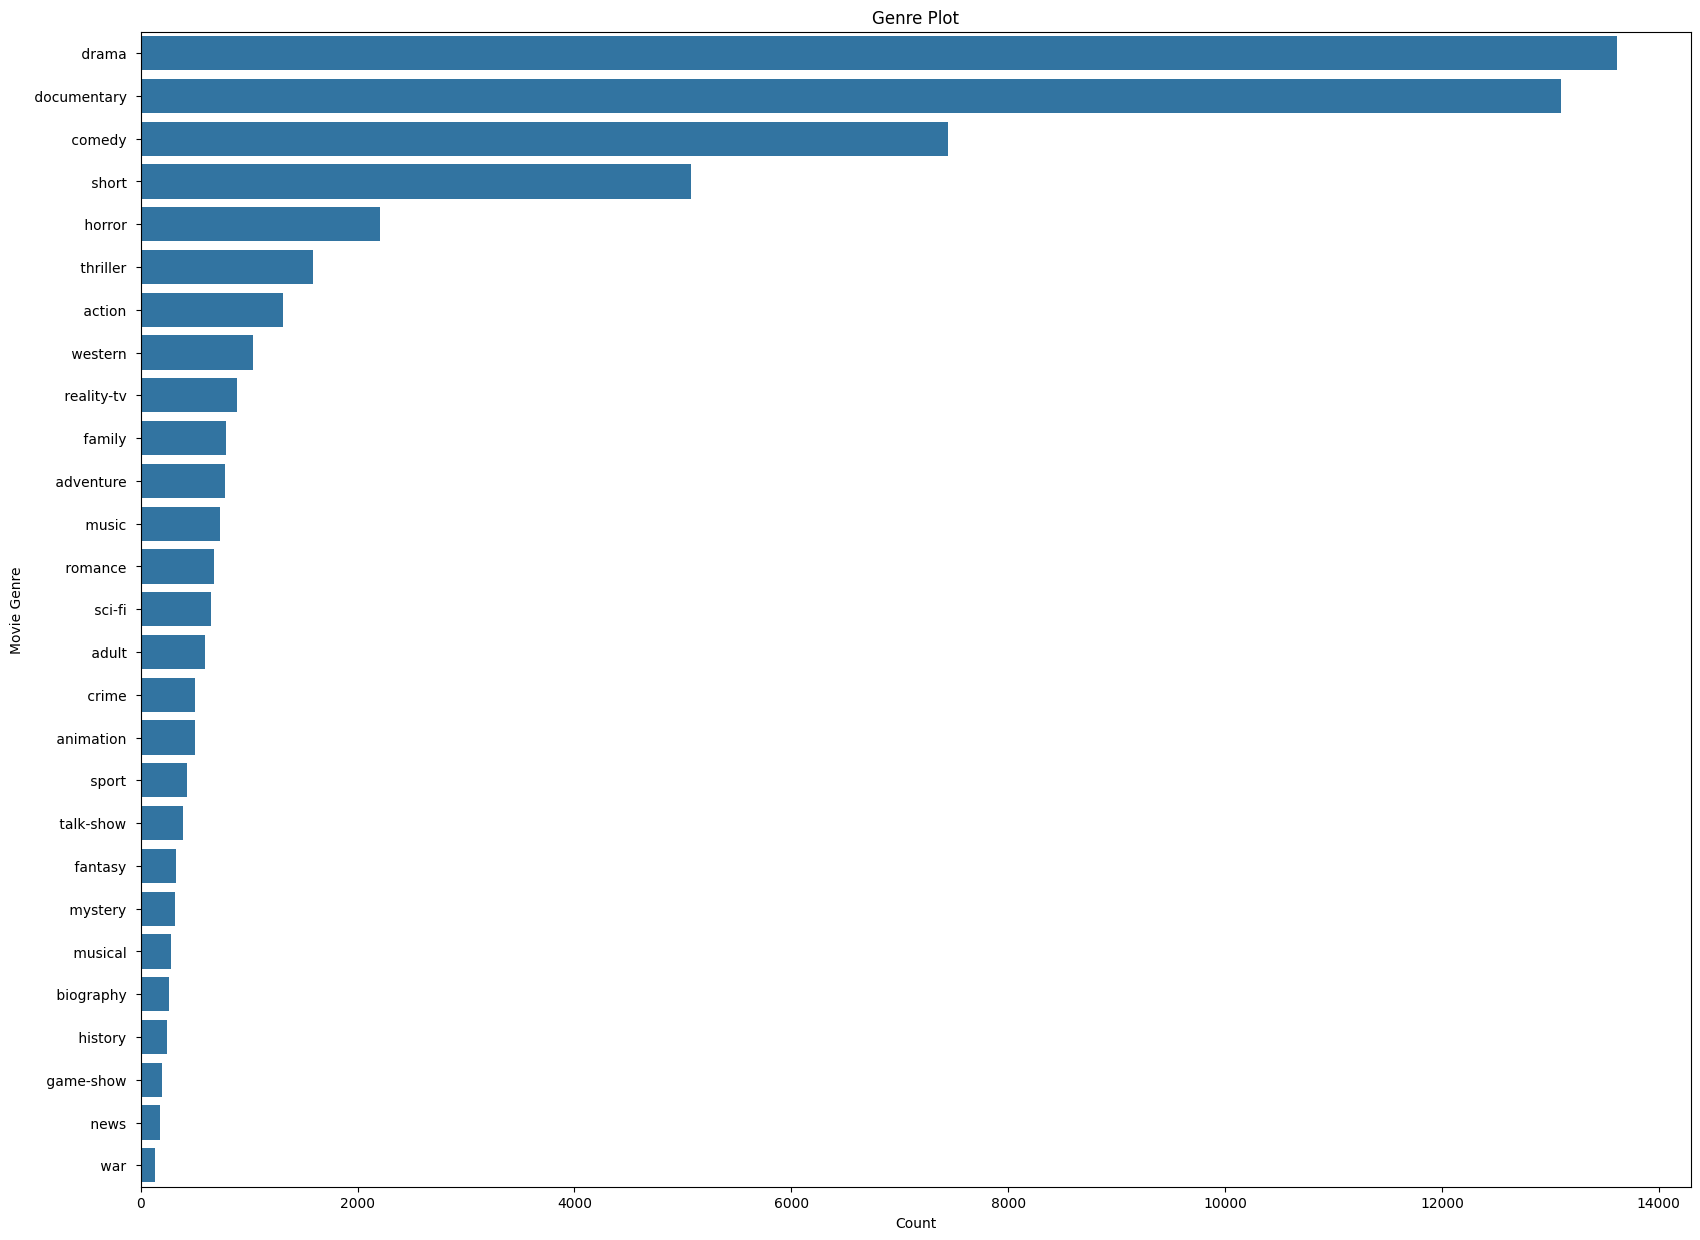

In [5]:
plt.figure(figsize=(20,15))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Genre Plot')
plt.xlabel('Count')
plt.ylabel('Movie Genre')
plt.show()

__Data Cleaning and Preprocessing__

In [6]:
genre_list=list(train_data['GENRE'].unique())

In [7]:
genre_list.sort()

In [8]:
genre_list

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

# Mostly Watched Genre

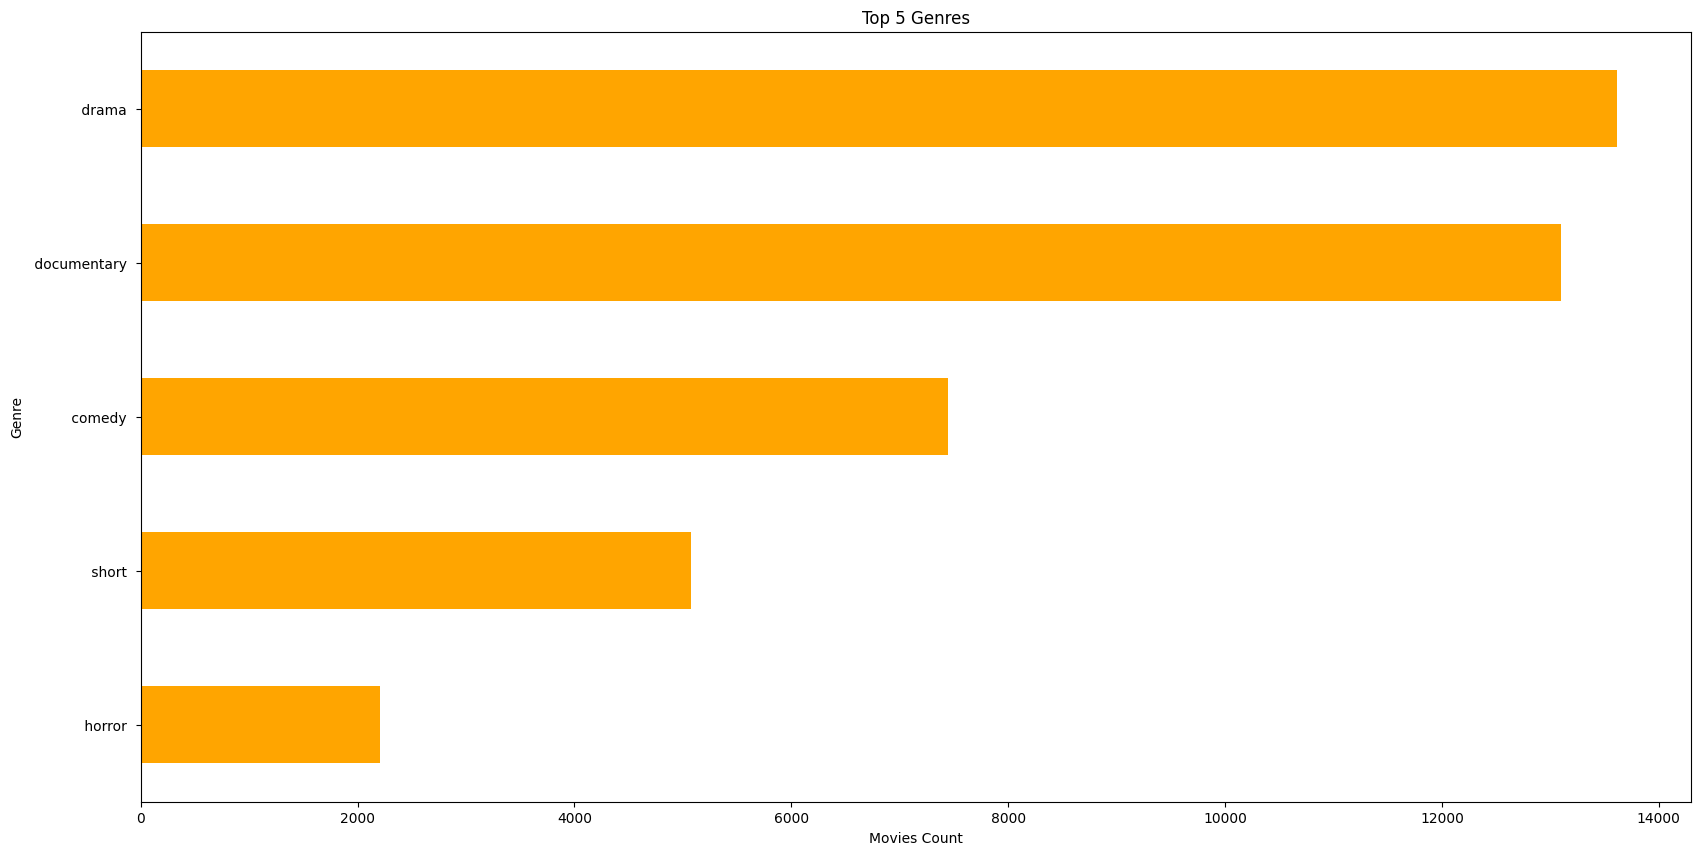

In [9]:
# Top 5 most watched genre
top_genres = train_data['GENRE'].value_counts().head(5)
plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='orange')
plt.title('Top 5 Genres')
plt.xlabel('Movies Count')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  
plt.show()

# Representation of Description length against Genre

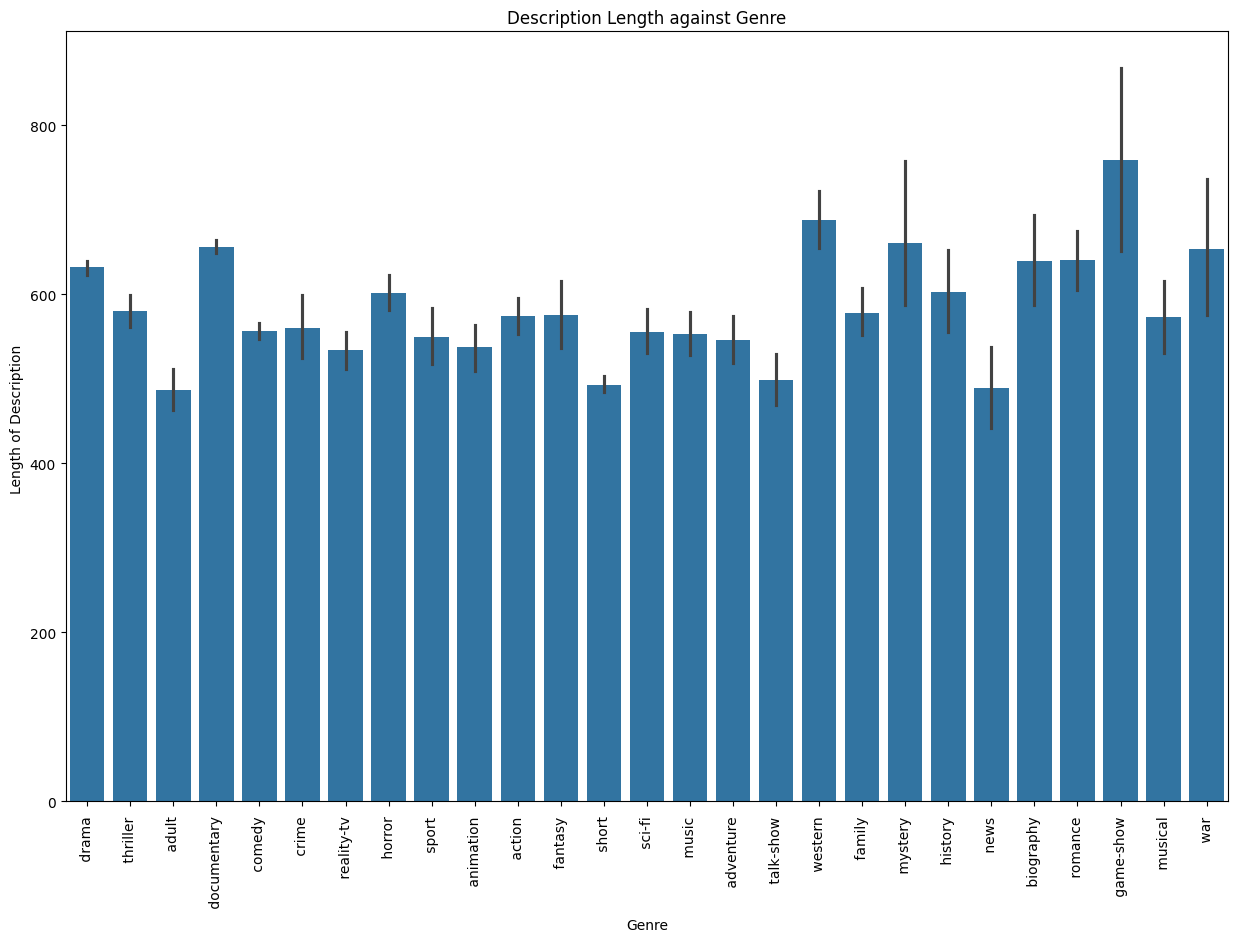

In [10]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length against Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Length of Description ')
plt.show()

# Handling missing values with empty string

In [11]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

C:\Users\Shivam Sagar\AppData\Local\Temp\ipykernel_8652\838394437.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data['DESCRIPTION'].fillna("", inplace=True)


In [12]:
#Vectorizing Data
tdf = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tdf.fit_transform(train_data['DESCRIPTION'])
X_test = tdf.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [13]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.5836945494789265
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
          16       0.43     

In [14]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Naive Bayes Classification

### Importing Libraries

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [17]:
mnb.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter=500)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [20]:
logistic_reg.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

### Fuction wihich can predict the genre of the movie

In [21]:
def predict_genre(description):
    t_v_t = tdf.transform([description])
    predict_label = clf.predict(t_v_t)
    return label_encoder.inverse_transform(predict_label)[0]

### Checking module with some random movie description

In [25]:
description1=''' "Lewis Stone urges movie-goers to appreciate those in the US armed forces who will be spending the holidays overseas, away from their 
                families. On behalf of everyone in motion pictures, he wishes them "a very happy, and a free, holiday." '''

In [26]:
print(predict_genre(description1))

 short 


In [27]:
description2=''' In late 19th century Vienna, Lena Smith, a naive peasant girl from Hungary, has a child by a corrupt young cavalry officer, and goes 
                to work his house as a servant, hiding the truth from his unsympathetic father, while the son returns to his profligate ways. Robbed 
                of her child first when he is a baby, and later when they are separated by the war, she suffers imprisonment, contempt, and shame in 
                order to protect the child. '''

In [28]:
print(predict_genre(description2))

 drama 


In [29]:
description3=''' On his first burglary, a locksmith finds himself on the run after his accomplice is run down by another band of thugs after the haul. 
                Realising that his girlfriend has double-crossed him for a seedy nightclub owner, the lad ends up with the loot in a flat above a clip 
                joint hiding out from both police and crooks. But the girls living there seem about as trustworthy as his own bird turned out to be. '''

In [30]:
print(predict_genre(description3))

 crime 


In [33]:
description4=''' A father, who is often away due to work, is unable to comprehend the intensity of his son's love. Ironically, this fervent love and 
                admiration for his father and family creates conflict between the father and son. '''

In [34]:
print(predict_genre(description4))

 drama 


## Thank you! 